##### Theoritical Probability

In [3]:
def coin_flip_probability():
  # Calculates the probability of heads in a fair coin flip.
  heads_probability = 1 / 2
  return heads_probability

In [4]:
def rolling_dice_probability(number):
  # Calculates the probability of rolling a specific number on a fair die.
  if number not in range(1, 7):
    raise ValueError("Number must be between 1 and 6")
  probability = 1 / 6
  return probability

In [9]:
# Using the functions
coin_flip_result = coin_flip_probability()
dice_roll_result = rolling_dice_probability(4)

In [10]:
# Print the probabilities
print("Probability of heads in a coin flip:", coin_flip_result)
print("Probability of rolling a 6 on a die:", dice_roll_result)

Probability of heads in a coin flip: 0.5
Probability of rolling a 6 on a die: 0.16666666666666666


##### Experimental Probability

In [12]:
import random
import pandas as pd

In [18]:
def simulate_coin_flips(num_flips):
  """Simulates coin flips and returns a list of results (heads or tails)"""
  results = []
  for _ in range(num_flips):
    flip = random.choice(["heads", "tails"])
    results.append(flip)
  return results

In [19]:
pd.Series(simulate_coin_flips(100)).value_counts()

tails    55
heads    45
Name: count, dtype: int64

In [20]:
def calculate_experimental_probability(results, event):
  # Calculates the experimental probability of a specific event (heads or tails)"""
  event_count = results.count(event)
  total_flips = len(results)
  probability = event_count / total_flips
  return probability

In [28]:
num_flips = 1000
simulation_results = simulate_coin_flips(num_flips)
heads_probability = calculate_experimental_probability(simulation_results, "heads")
tails_probability = calculate_experimental_probability(simulation_results, "tails")

print(f"Number of flips: {num_flips}")
print(f"Heads probability: {heads_probability:.4f}")
print(f"Tails probability: {tails_probability:.4f}")

Number of flips: 1000
Heads probability: 0.5130
Tails probability: 0.4870


##### Axiomatic Probability

In [30]:
# Sample space
S = ['Heads', 'Tails']

In [31]:
# Define the probabilities of events A and B
P_A = 0.5  # Probability of getting Heads
P_B = 0.5  # Probability of getting Tails

In [33]:
# Axiom 1: Non-negativity
assert P_A >= 0 and P_B >= 0, "Axiom 1 (Non-negativity) violated"

In [34]:
# Axiom 2: Unit Measure
P_S = P_A + P_B
assert P_S == 1, "Axiom 2 (Unit Measure) violated"

In [35]:
# Axiom 3: Additivity (Since A and B are mutually exclusive)
P_A_union_B = P_A + P_B
assert P_A_union_B == P_S, "Axiom 3 (Additivity) violated"

In [36]:
# Print the results
print("All axioms of probability are satisfied.")

All axioms of probability are satisfied.


##### Bayes Theorem for Classification

In [38]:
# Dataset: Social_Network_Ads.csv
# Location: https://mitu.co.in/dataset

In [39]:
# Download and save in current working directory
import os
os.getcwd()

'/home/mitu/Documents/study/Data Science/pgduasp/Programs-Apr24'

In [40]:
df = pd.read_csv('Social_Network_Ads.csv')

In [41]:
df.shape

(400, 5)

In [42]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [43]:
# Separate the input and output data
x = df[['Age','EstimatedSalary']]
y = df['Purchased']

In [44]:
import matplotlib.pyplot as plt

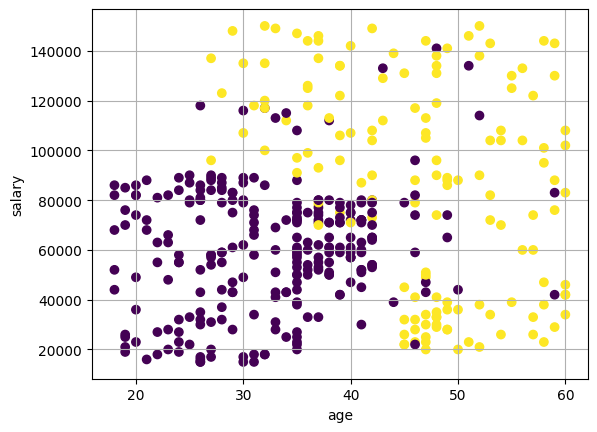

In [46]:
plt.xlabel('age')
plt.ylabel('salary')
plt.grid()
plt.scatter(x['Age'], x['EstimatedSalary'], c = y)

In [48]:
# import the class
from sklearn.naive_bayes import GaussianNB

In [49]:
# create the object
nb = GaussianNB()

In [50]:
# apply the data
nb.fit(x, y)

GaussianNB()

In [51]:
# new customer data
new = pd.DataFrame({
    'Age': [45,56,22],
    'EstimatedSalary':[78000,134000,38500]
})

In [52]:
new

,Age,EstimatedSalary
0,45,78000
1,56,134000
2,22,38500


In [53]:
nb.predict_proba(new)

array([[0.45681527, 0.54318473],
       [0.00190628, 0.99809372],
       [0.98920601, 0.01079399]])

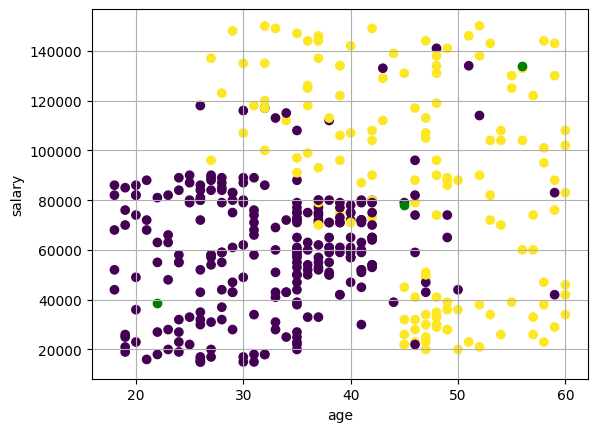

In [54]:
plt.xlabel('age')
plt.ylabel('salary')
plt.grid()
plt.scatter(x['Age'], x['EstimatedSalary'], c = y)
plt.scatter(new['Age'], new['EstimatedSalary'], color = 'g')